# Projet Machine Learning en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-learn"/></a>

# Introduction

Les données sont issues du site du concours KAGGLE; il s’agit du jeu de données " Gym Members Exercise
Dataset" disponible ici : https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset.
Ce jeu de données fournit un aperçu détaillé des routines d’exercice, des attributs physiques et des mesures
de la condition physique des membres d’une salle de sport. Il contient 15 variables observées chez 973 individus
fréquentant une salle de sport :
- Age : âge du membre de la salle de sport.
- Gender : Sexe du membre de la salle de sport (qualitative à deux modalités : homme ou femme).
- Weight..kg. : Poids du membre en kilogrammes.
- Height..m. : Taille du membre en mètres.
- Max_BPM : Fréquence cardiaque maximale (battements par minute) pendant les séances d’entraînement.
- Avg_BPM : Fréquence cardiaque moyenne pendant les séances d’entraînement.
- Resting_BPM : Fréquence cardiaque au repos avant l’entraînement.
- Session_Duration..hours. : Durée de chaque séance d’entraînement en heures.
- Calories_Burned : Total des calories brûlées au cours de chaque séance.
- Workout_Type : Type d’entraînement effectué (qualitative à 4 modalités : cardio, musculation, yoga,
HIIT).
- Fat_Percentage (Pourcentage de graisse) : Pourcentage de graisse corporelle du membre.
- Water_Intake..liters. : Consommation quotidienne d’eau pendant les séances d’entraînement.
- Workout_Frequency..days.week. : Nombre de séances d’entraînement par semaine (qualitative à 4
modalités : 2 à 5).
- Experience_Level : Niveau d’expérience (qualitative à 3 modalités : 1 pour débutant à 3 pour expert).
- BMI : Indice de masse corporelle (IMC), calculé à partir de la taille et du poids.

  
Dans ce projet, on souhaite dans un premier temps, prédire la variable **Calories_Burned** à partir de toutes
les autres variables, et dans un second temps, prédire la variable **Experience_Level** à partir de toutes les autres
variables (dont Calories_Burned).

Pour cela nous allons commencer par une exploration des variables quantitatives et qualitatives. Ensuite nous passerons à la modélisation des variables à prédire.


In [1]:
# Chargement des librairies nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


<h1 style="color:red">I)  Exploration des variables</h1>


### 1) Prise en charge des données : Vérification de la nature des différentes variables et leur encodage. Convertion des variables qualitatives.

In [2]:
# Lecture des données
path = ""
gym = pd.read_csv("gym_members_exercise_tracking.csv")

# Affichage des premières lignes
print("Aperçu des premières lignes du jeu de données:")
display(gym.head())  

# Résumé statistique
print("\nRésumé statistique du jeu de données:")
display(gym.describe(include='all'))  

Aperçu des premières lignes du jeu de données:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39



Résumé statistique du jeu de données:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973,973.000000,973.000000,973.000000,973.000000,973.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strength,NaN,NaN,NaN,NaN,NaN
freq,NaN,511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258,NaN,NaN,NaN,NaN,NaN
mean,38.683453,NaN,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,NaN,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,NaN,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,NaN,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,NaN,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,NaN,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,NaN,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,NaN,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,NaN,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,NaN,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,NaN,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,NaN,29.300000,3.100000,4.000000,2.000000,28.560000


On remarque que il y a plusieurs variables qualitatives : Gender, Workout_Type.
De même certaines variables ne prennent pas beaucoup de valeurs différentes donc il est intérréssant de les convertir en facteur : Experience_Level, Workout_Frequency..days.week.

Les autres variables sont des variables quantitatives que l'on transformera plus tard. 

In [3]:
print(gym.columns.tolist())

['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']


In [4]:
# Nettoyage des noms de colonnes : suppression des unités entre parenthèses et espaces
gym.columns = (
    gym.columns
    .str.replace(r"\s*\(.*?\)", "", regex=True)  # Supprime tout ce qui est entre parenthèses
    .str.replace(" ", "_")                      # Remplace les espaces par des underscores
)


In [5]:
print(gym.columns.tolist())

['Age', 'Gender', 'Weight', 'Height', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake', 'Workout_Frequency', 'Experience_Level', 'BMI']


In [6]:
# Conversion des colonnes en types catégoriels
categorical_columns = [
    "Gender",
    "Workout_Type",
    "Experience_Level",
    "Workout_Frequency"
]

for col in categorical_columns:
    gym[col] = gym[col].astype("category")


### 2) Exploration par une analyse descriptive unidimensionnelle des données.

Conformément aux analyses faites sur le fichier R, nous transformons les variables Weight et BMI.

In [7]:
# Application du logarithme sur les colonnes 'Weight..kg.' et 'BMI'
gym["LWeight"] = np.log(gym["Weight"])
gym["LBMI"] = np.log(gym["BMI"])

# Supprimer les colonnes originales
gym.drop(columns=["Weight", "BMI"], inplace=True)

In [8]:
print("\nRésumé statistique du jeu de données:")
display(gym.describe(include='all'))  


Résumé statistique du jeu de données:


,Age,Gender,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,LWeight,LBMI
count,973.000000,973,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973,973.000000,973.000000,973.0,973.0,973.000000,973.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,4.0,3.0,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,Strength,NaN,NaN,3.0,2.0,NaN,NaN
freq,NaN,511,NaN,NaN,NaN,NaN,NaN,NaN,258,NaN,NaN,368.0,406.0,NaN,NaN
mean,38.683453,NaN,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,NaN,24.976773,2.626619,NaN,NaN,4.262981,3.180764
std,12.180928,NaN,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,NaN,6.259419,0.600172,NaN,NaN,0.277751,0.263097
min,18.000000,NaN,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,NaN,10.000000,1.500000,NaN,NaN,3.688879,2.511224
25%,28.000000,NaN,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,NaN,21.300000,2.200000,NaN,NaN,4.062166,3.001217
50%,40.000000,NaN,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,NaN,26.200000,2.600000,NaN,NaN,4.248495,3.184698
75%,49.000000,NaN,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,NaN,29.300000,3.100000,NaN,NaN,4.454347,3.352007


<h1 style="color:red">II- Prédiction des Calories Brulées</h1>


Nous considérons maintenant le problème de la prédiction la variable Calories_Burned à partir des autres
variables du point de vue de l’apprentissage automatique, c’est-à-dire en nous concentrant sur les performances
du modèle. L’objectif est de déterminer les meilleures performances que nous pouvons attendre, et les modèles
qui les atteignent. 

## 2.1 Division du jeu de données en un échantillon d'apprentissage et un échantillon test
Nous divisons le jeu de données en un échantillon d’apprentissage et un échantillon test. Nous prenons un 
pourcentage de 20% pour l’échantillon test. 


In [9]:
#Variables qualitatives
qual_vars = gym.select_dtypes(include="category").columns.tolist()
gymDum = pd.get_dummies(gym[qual_vars], drop_first=True)
print(qual_vars)

['Gender', 'Workout_Type', 'Workout_Frequency', 'Experience_Level']


In [10]:
gymQuant=gym[['Age', 'Height', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration',  'Fat_Percentage', 'Water_Intake',  'LWeight', 'LBMI']]
dfC=pd.concat([gymDum,gymQuant],axis=1)
dfC.head()

# variable à expliquer réelle
Yr=gym["Calories_Burned"]

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Yr_train, Yr_test = train_test_split(dfC, Yr, test_size=0.2, random_state=235)

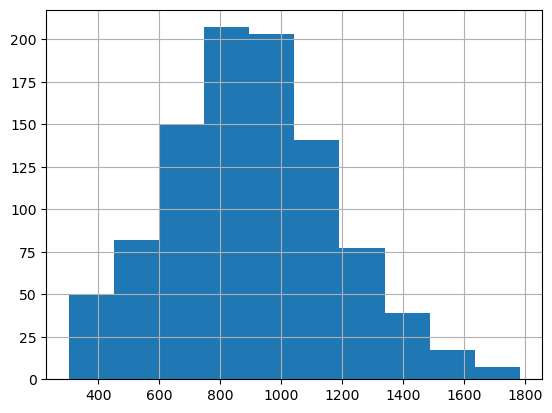

In [12]:
Yr.hist()
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler  
# L'algorithme des réseaux de neurones nécessite éventuellement une normalisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)


##  2.2 Modèle linéaire (généralisé) avec/sans sélection de variables, avec/sans pénalisation


travail ensuite : Comparez les performances d’un modèle linéaire (éventuellement généralisé) avec/sans sélection de variables, avec/sans pénalisation, d’un SVR/SVM, d’un arbre optimal, d’une forêt aléatoire, du boosting,
et de réseaux de neurones. Justifiez vos choix (par exemple le noyau pour le SVR/SVM), et ajustez
soigneusement les hyperparamètres de chaque modèle (par validation croisée). Interprétez les résultats et
quantifiez l’amélioration éventuelle apportée par les modèles non linéaires.

### 2.2.1 Sélection de variable par régularisation L1 (LASSO)

In [29]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
regLasso = linear_model.Lasso()
regLasso.fit(Xr_train,Yr_train)
prev=regLasso.predict(Xr_test)
print("MSE=",mean_squared_error(Yr_test,prev))

MSE= 1438.8323559129444


In [15]:
from sklearn.metrics import r2_score
print("R2=",r2_score(Yr_test,prev))

R2= 0.9811799492144176


Le paramètre de pénalisation Lasso est optimisé par validation croisée ci dessous.

In [16]:
from sklearn.model_selection import GridSearchCV

# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.5,0.8,1,3, 3, 4.52]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=10,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, Yr_train)


# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.977778, Meilleur paramètre = {'alpha': 0.8}


In [17]:
# Résultats de prédiction sur l'échantillon de test
prev=regLassOpt.predict(Xr_test)
mse_mod_lin_lasso=mean_squared_error(prev,Yr_test)
r2_mod_lin_lasso=r2_score(Yr_test,prev)
print("MSE=", mse_mod_lin_lasso)
print("R2=",r2_mod_lin_lasso)

MSE= 1444.709428437312
R2= 0.9811030766010623


In [18]:
# Coefficients gardés par Lasso
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(Xr_train,Yr_train)
model_lasso.coef_
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 11 variables et en supprime 8


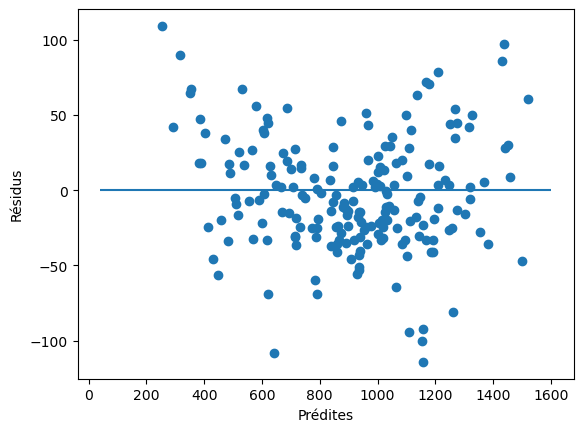

In [19]:
# Résidus sur l'échantillon de test
plt.plot(prev,Yr_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,40,1600)
plt.show()

Text(0.5, 1.0, 'Coefficients du modèle lasso')

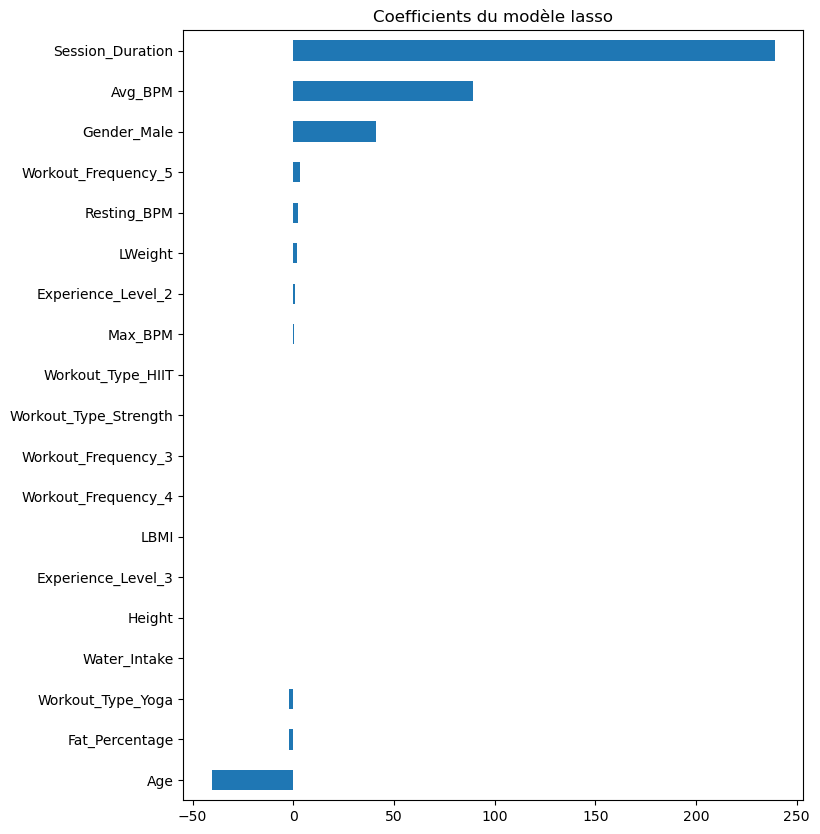

In [20]:
#Importance des paramètres

imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients du modèle lasso")

Le lambda optimal (alpha) trouvé par Python correspond au lambda min trouvé en R. Toutefois, avec un même paramètre de régularisation, le code python de la prédiction de modèle linéaire a de meilleurs résultats que R.

## 2.3 Support Vector Regression(SVR)


### 2.3.1 Régression sur l'échantillon d'apprentissage

Nous nous interressons seulement au noyau gaussien. Nous estimons les paramètres optimaux par validation croisée.

In [39]:
from sklearn.svm import SVR

Meilleurs paramètres trouvés : {'C': 3.5, 'gamma': 0.01}


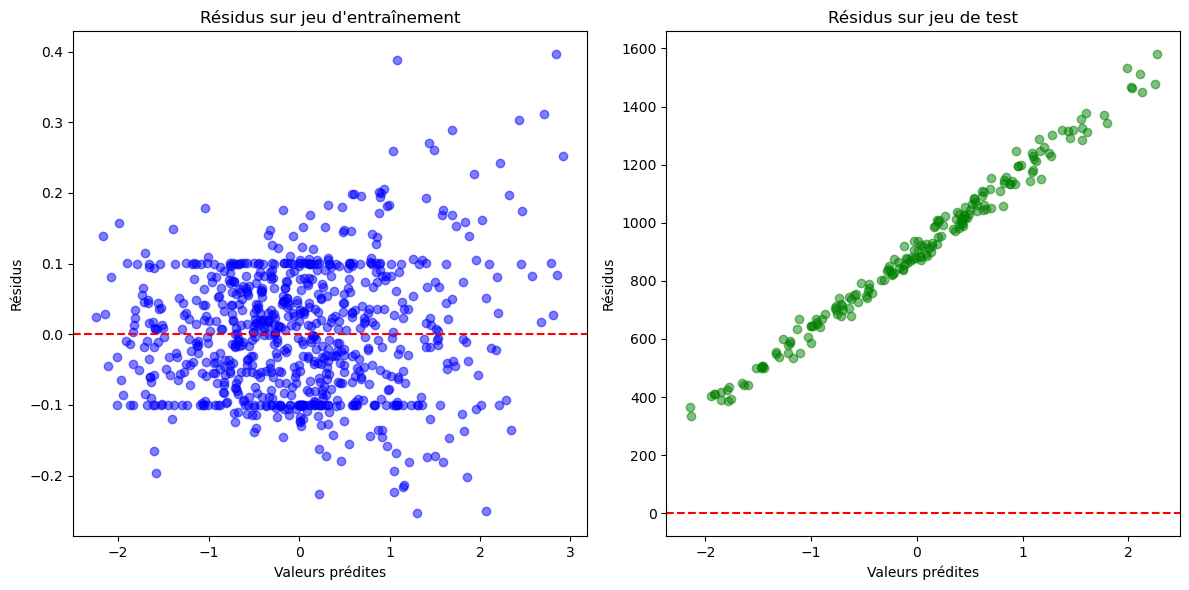

In [43]:

# Définition du modèle SVR et des hyperparamètres à tester
svr = SVR()
param_grid = {
    'C': [0.1,0.5, 1,2.5,3.5],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# Grid Search avec validation croisée
grid_search = GridSearchCV(svr, param_grid, cv=10)
grid_search.fit(Xr_train, Yr_train)

# Meilleur modèle
best_svr = grid_search.best_estimator_
print("Meilleurs paramètres trouvés :", grid_search.best_params_)

# Prédiction sur les jeux de données
Yr_train_pred = best_svr.predict(Xr_train)
Yr_test_pred = best_svr.predict(Xr_test)

# Calcul des résidus
residus_train = Yr_train - Yr_train_pred
residus_test = Yr_test - Yr_test_pred

# Tracé des résidus
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Yr_train_pred, residus_train, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Résidus sur jeu d'entraînement")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")

plt.subplot(1, 2, 2)
plt.scatter(Yr_test_pred, residus_test, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Résidus sur jeu de test")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")

plt.tight_layout()
plt.show()

Nous allons maintenant tester sur l'échantillon de test.

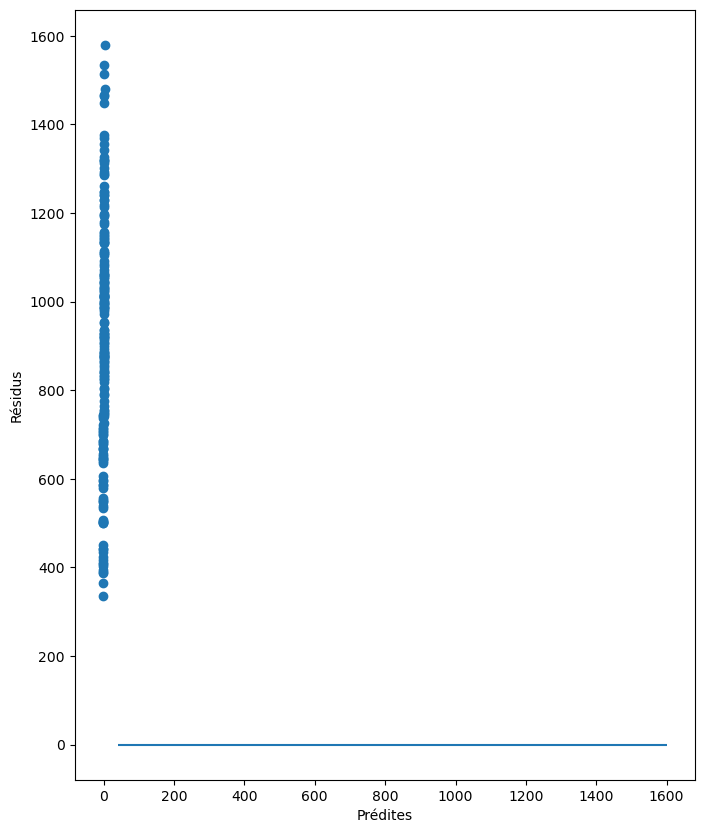

In [46]:
# Résidus sur l'échantillon de test
plt.plot(Yr_test_pred,Yr_test-Yr_test_pred,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,40,1600)
plt.show()

GROS PROBLEME SUR LA PREDICTION DANS L ECHANTILLON TEST, CA MARCHE PAS DU TOUT, ya un problème

Sur le graphe on voit que la valeur de cp optimale est la valeur la plus basse.

##### Arbre Optimal

##### Graphe des résidus

### 2.4.2 Erreur de régression

Erreur quadratique moyenne Arbre optimal : 6600.937 


## 2.5 Forêt aléatoire

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : ‘randomForest’


L'objet suivant est masqué depuis ‘package:gridExtra’:

    combine


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine


L'objet suivant est masqué depuis ‘package:ggplot2’:

    margin




### 2.5.1 Regression

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |     4999     6.73 |     5093     6.89 |
 100 |     4564     6.14 |     4978     6.73 |
 150 |     4311     5.80 |     4862     6.58 |
 200 |     4158     5.59 |     4776     6.46 |
 250 |     4088     5.50 |     4746     6.42 |
 300 |     3990     5.37 |     4739     6.41 |
 350 |     3967     5.34 |     4731     6.40 |
 400 |     3939     5.30 |     4700     6.36 |
 450 |     3918     5.27 |     4724     6.39 |
 500 |     3916     5.27 |     4731     6.40 |
 550 |     3933     5.29 |     4805     6.50 |
 600 |     3936     5.30 |     4820     6.52 |


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


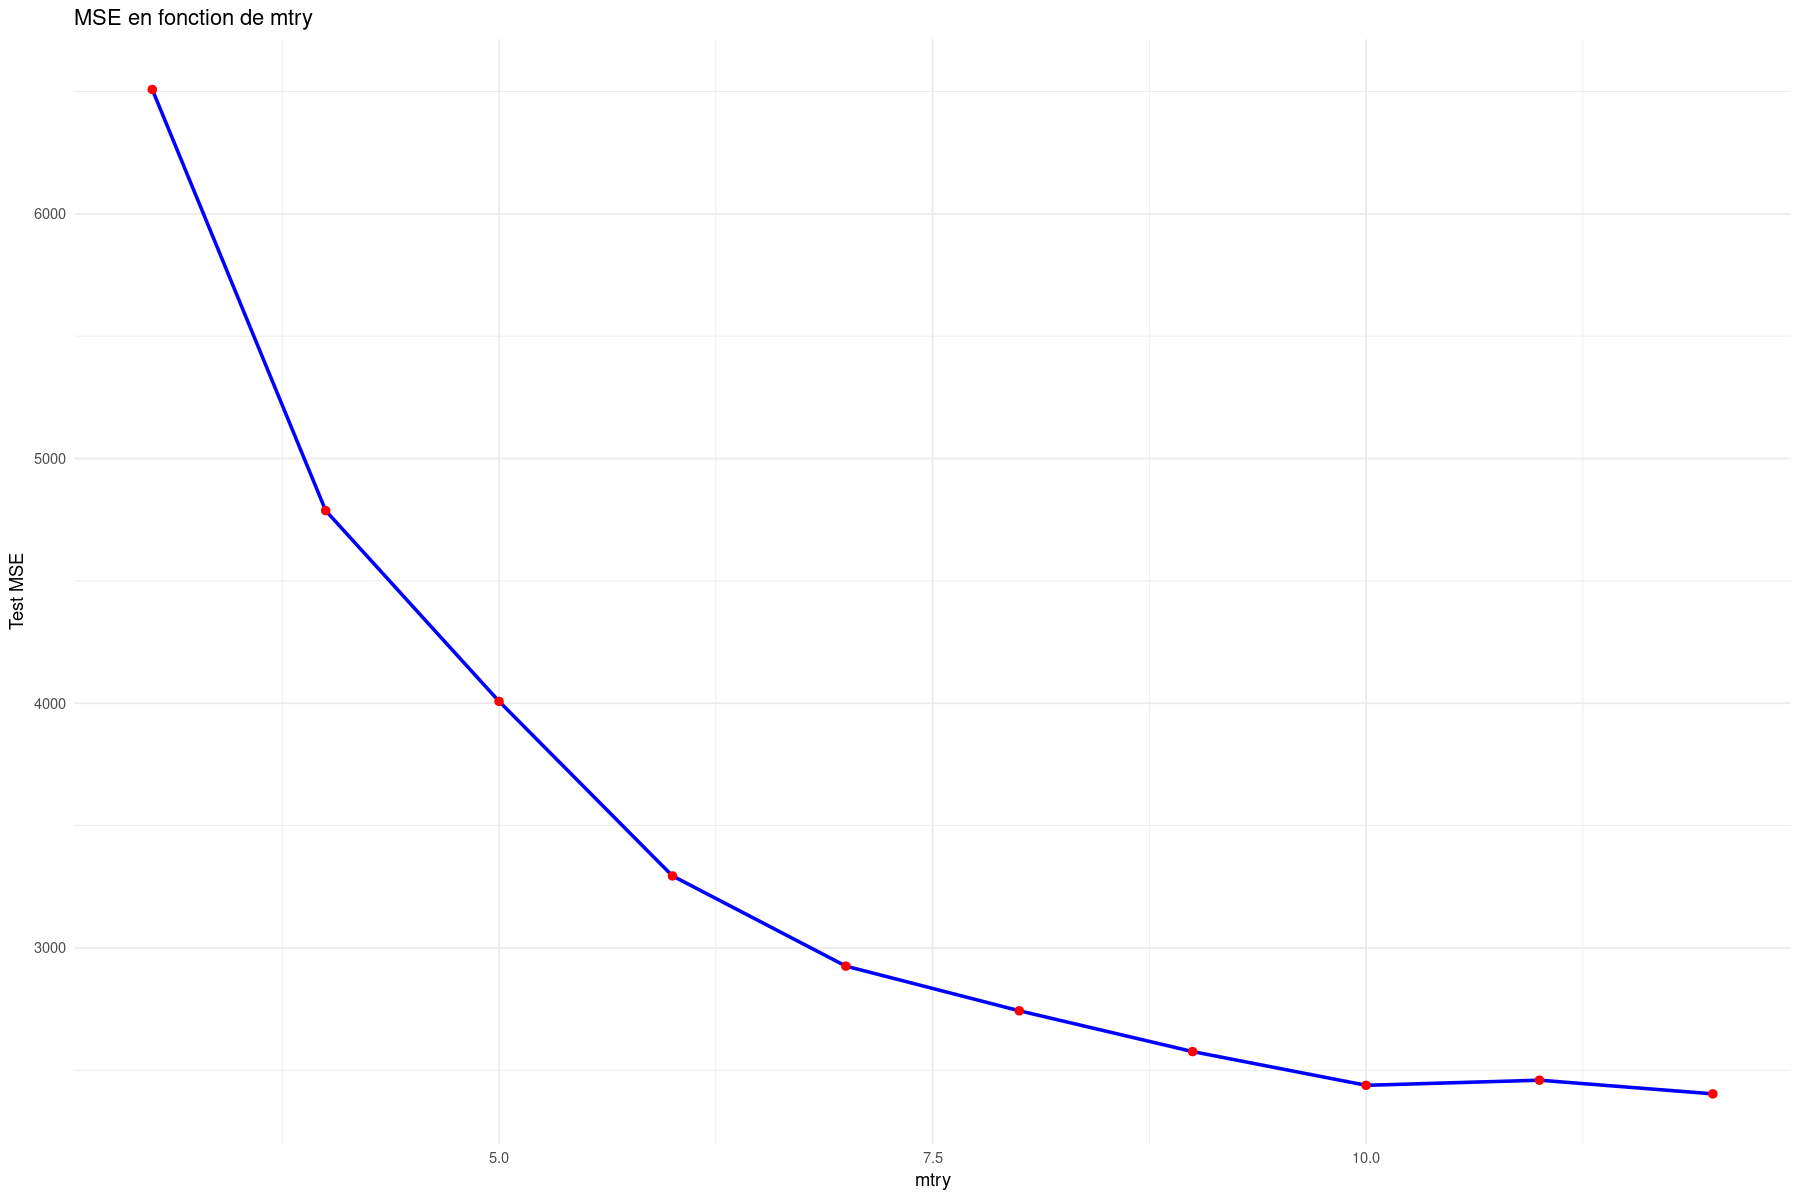

Le mrty optimal est 10.

Le code au dessus ne faitpas de validation croisée.

Déterminons le mtry optimal par validation croisée.

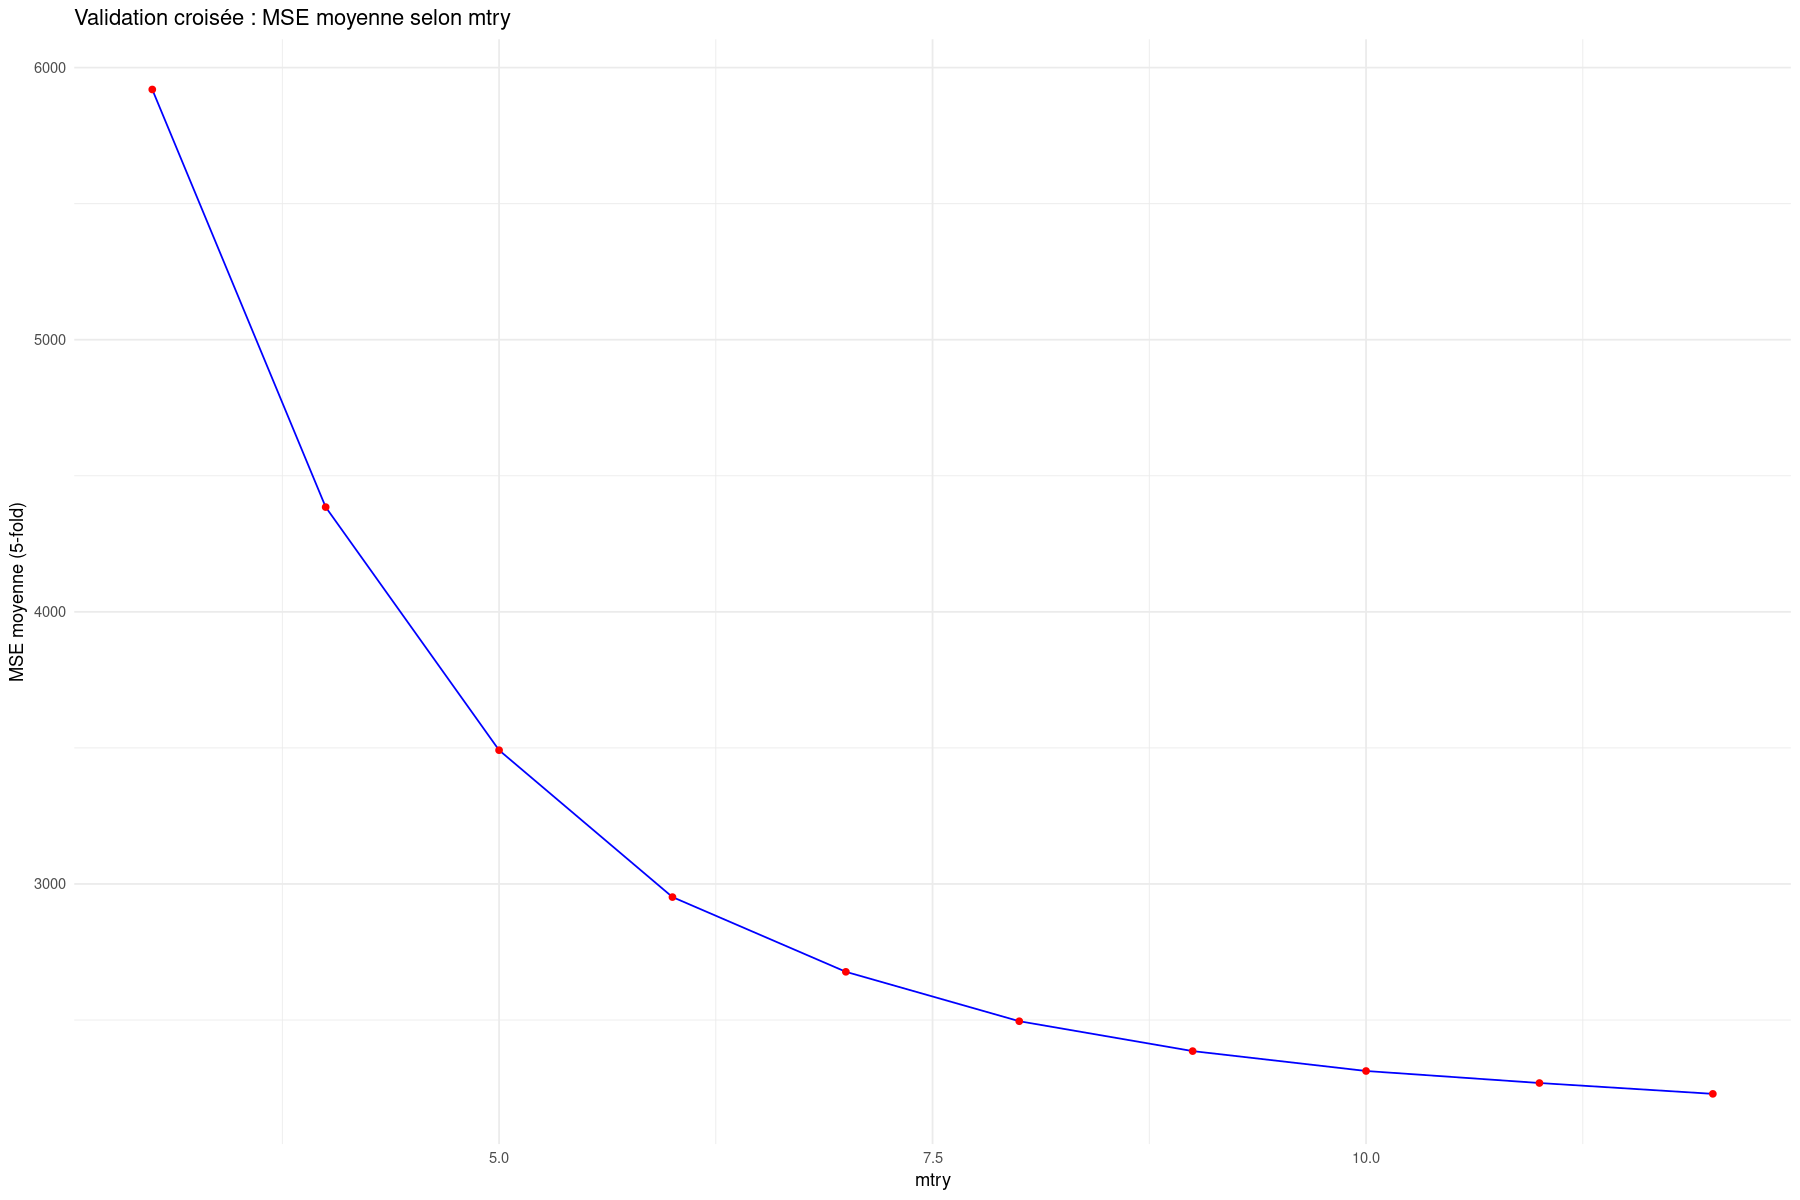

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |     2358     3.17 |     2764     3.74 |
 100 |     2226     2.99 |     2569     3.48 |
 150 |     2106     2.83 |     2545     3.44 |
 200 |     2080     2.80 |     2493     3.37 |
 250 |     2078     2.80 |     2490     3.37 |
 300 |     2058     2.77 |     2502     3.38 |
 350 |     2056     2.77 |     2467     3.34 |
 400 |     2042     2.75 |     2462     3.33 |
 450 |     2042     2.75 |     2466     3.34 |
 500 |     2053     2.76 |     2459     3.33 |
 550 |     2047     2.75 |     2472     3.34 |
 600 |     2044     2.75 |     2472     3.34 |


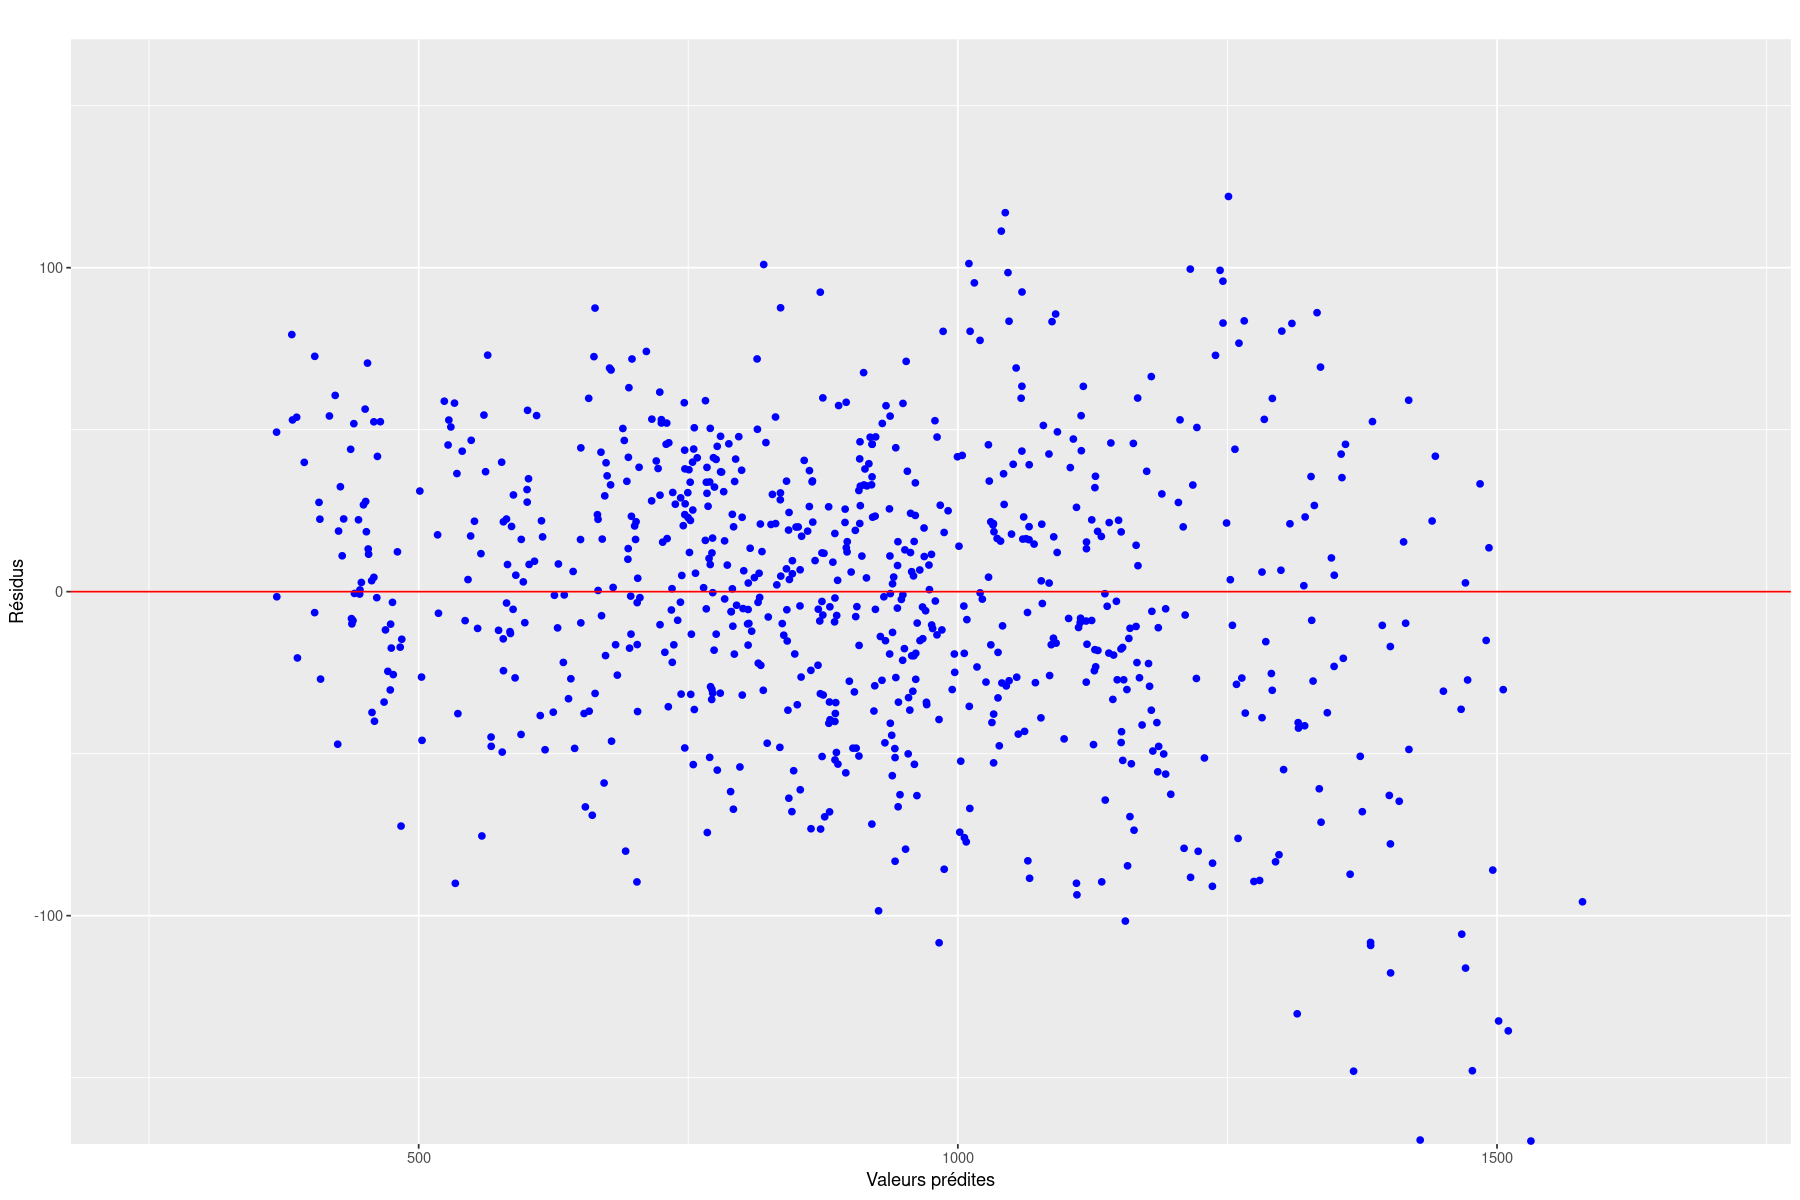

### 2.5.2 Prévision de l'échantillon test

Erreur quadratique moyenne Foret aléatoire : 2471.897

Ainsi les forêts aléatoires proposent un meilleur résultat que l'arbre optimal avec une MSE à 2508. C’est une amélioration logique, car les forêts aléatoires réduisent la variance du modèle grâce à l’agrégation de plusieurs arbres construits sur des sous-échantillons, ce qui améliore la précision par rapport à un arbre unique.

#### 2.5.3 Importance des variables

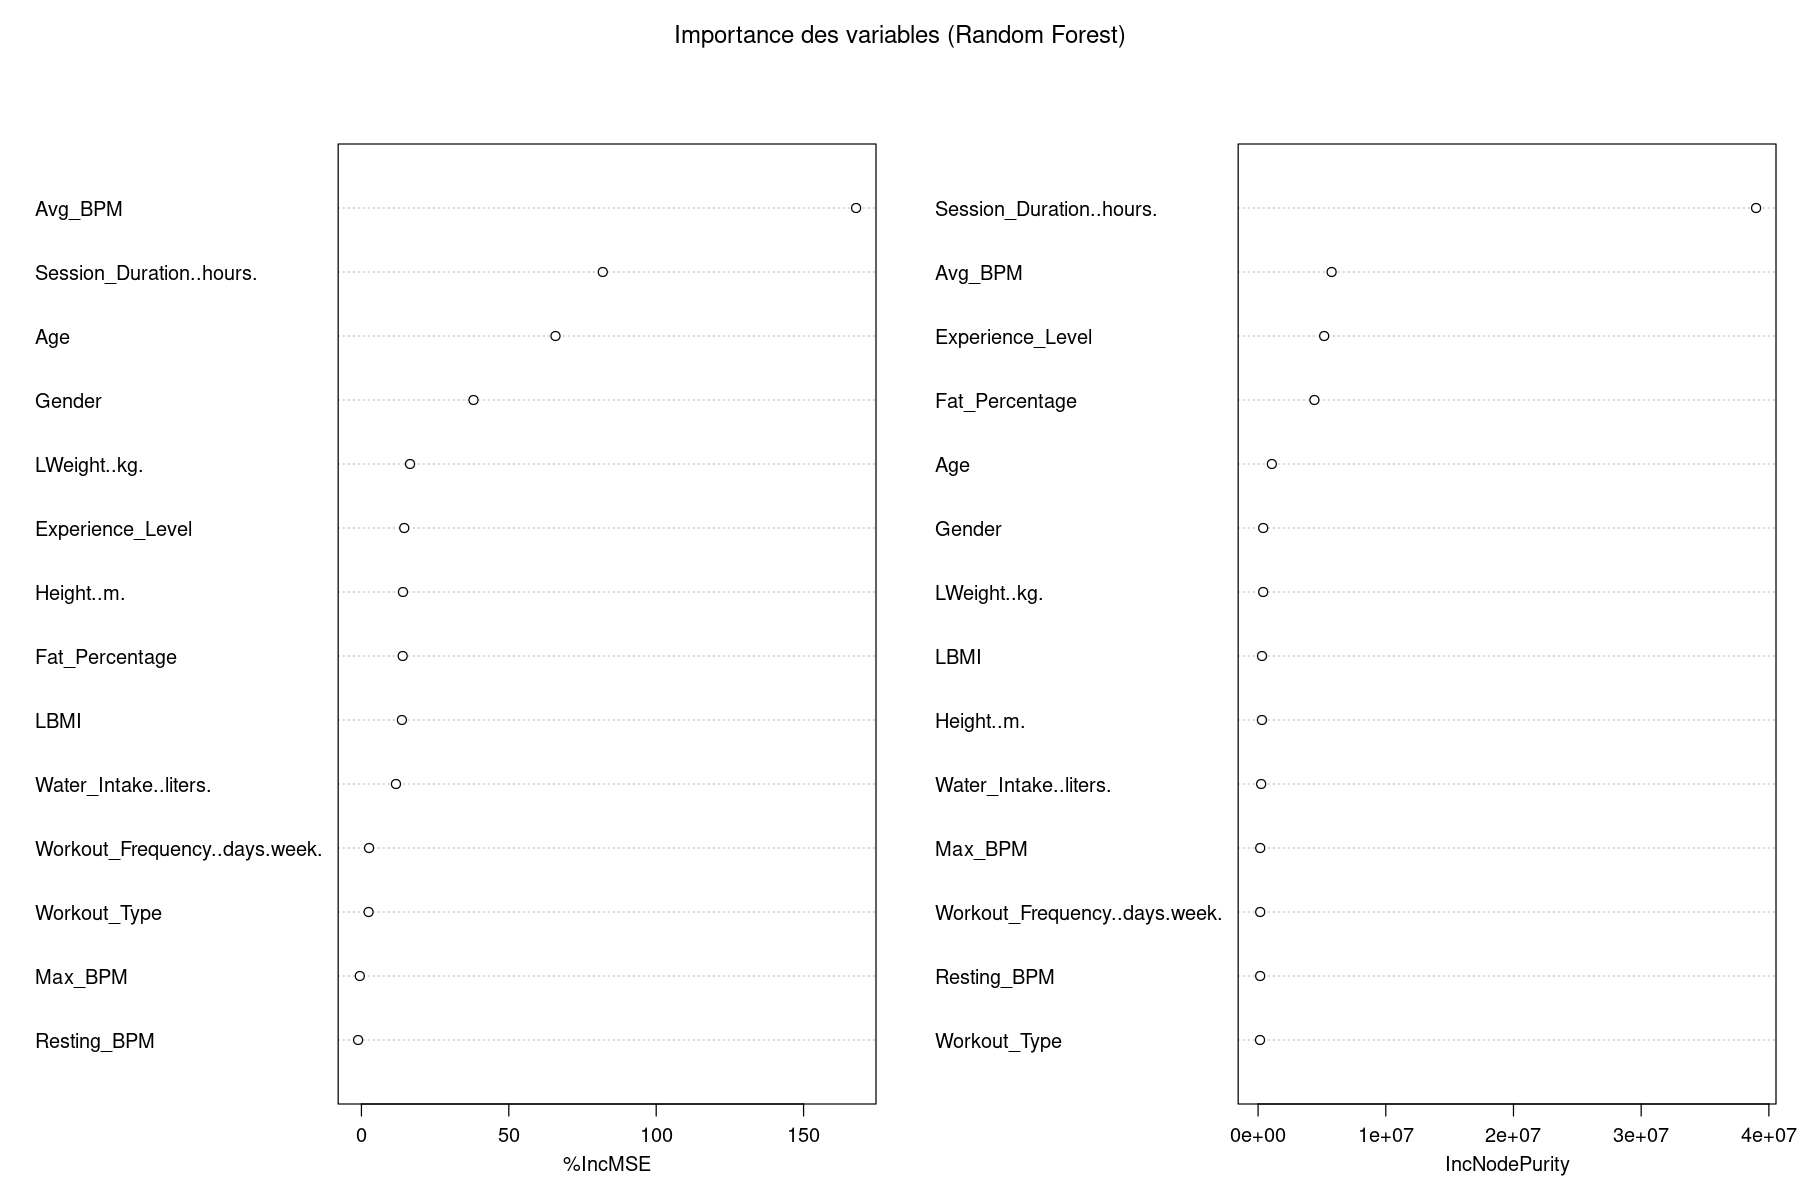

Commenter l'importance des variables .


## 2.6 Boosting

### 2.6.1 Régression

Loaded gbm 2.2.2

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



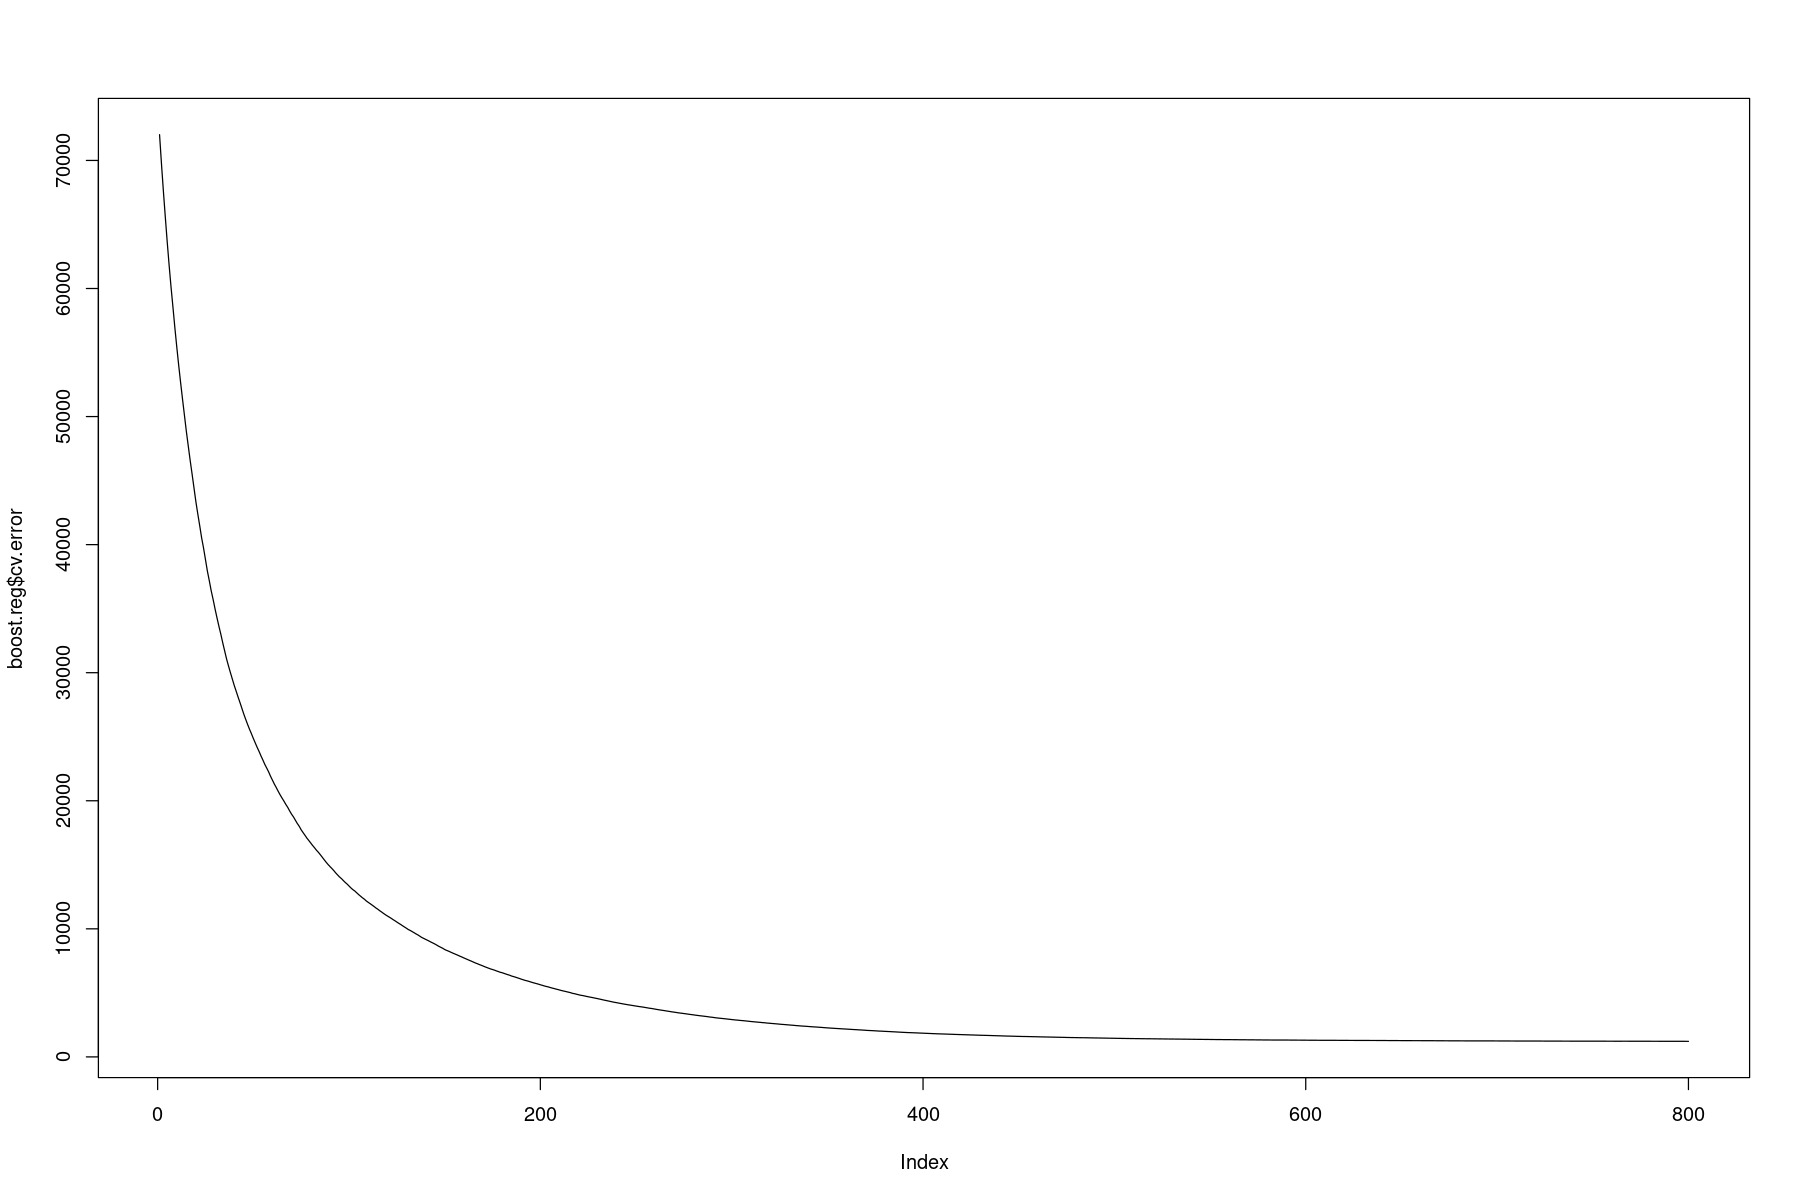

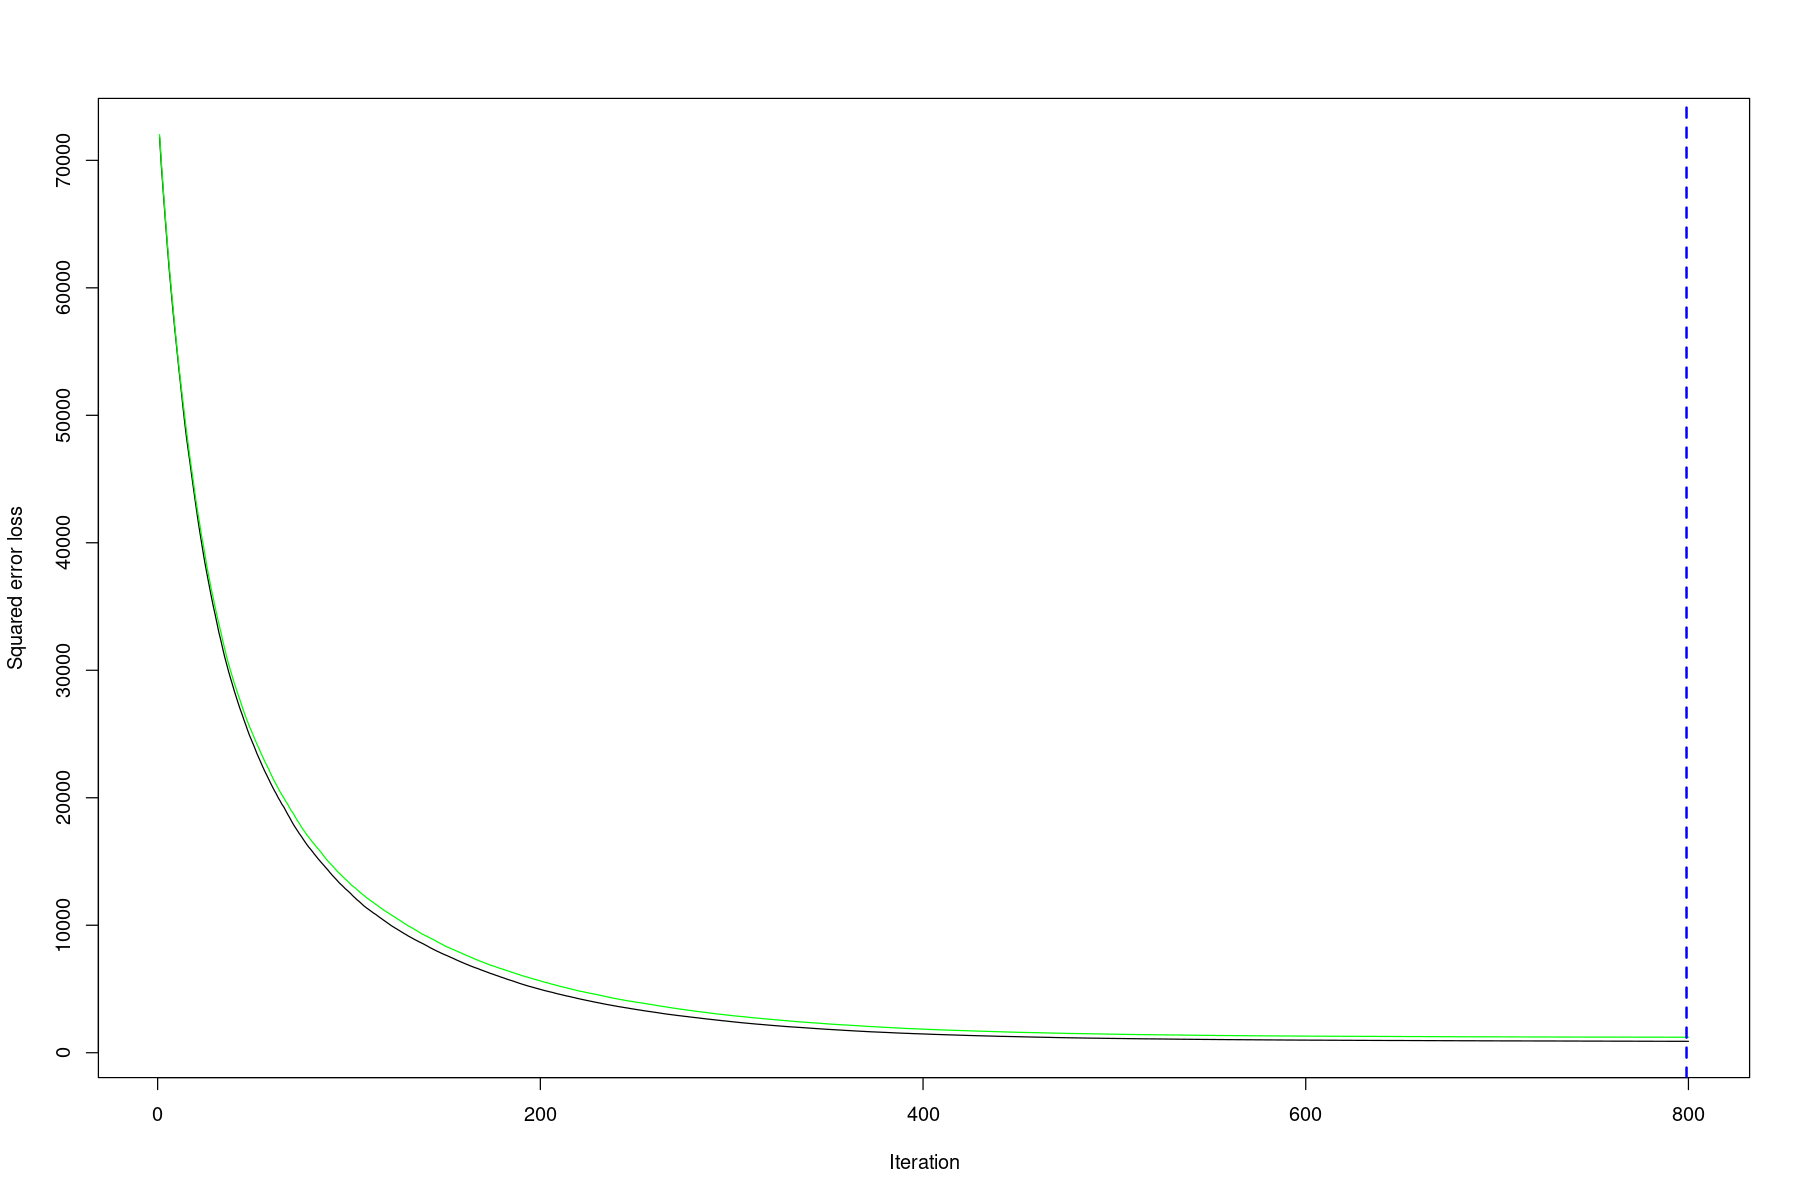

Le nombre d'arbre optimal est le plus grand soit 800 arbres. 

##### Calcul des résidus

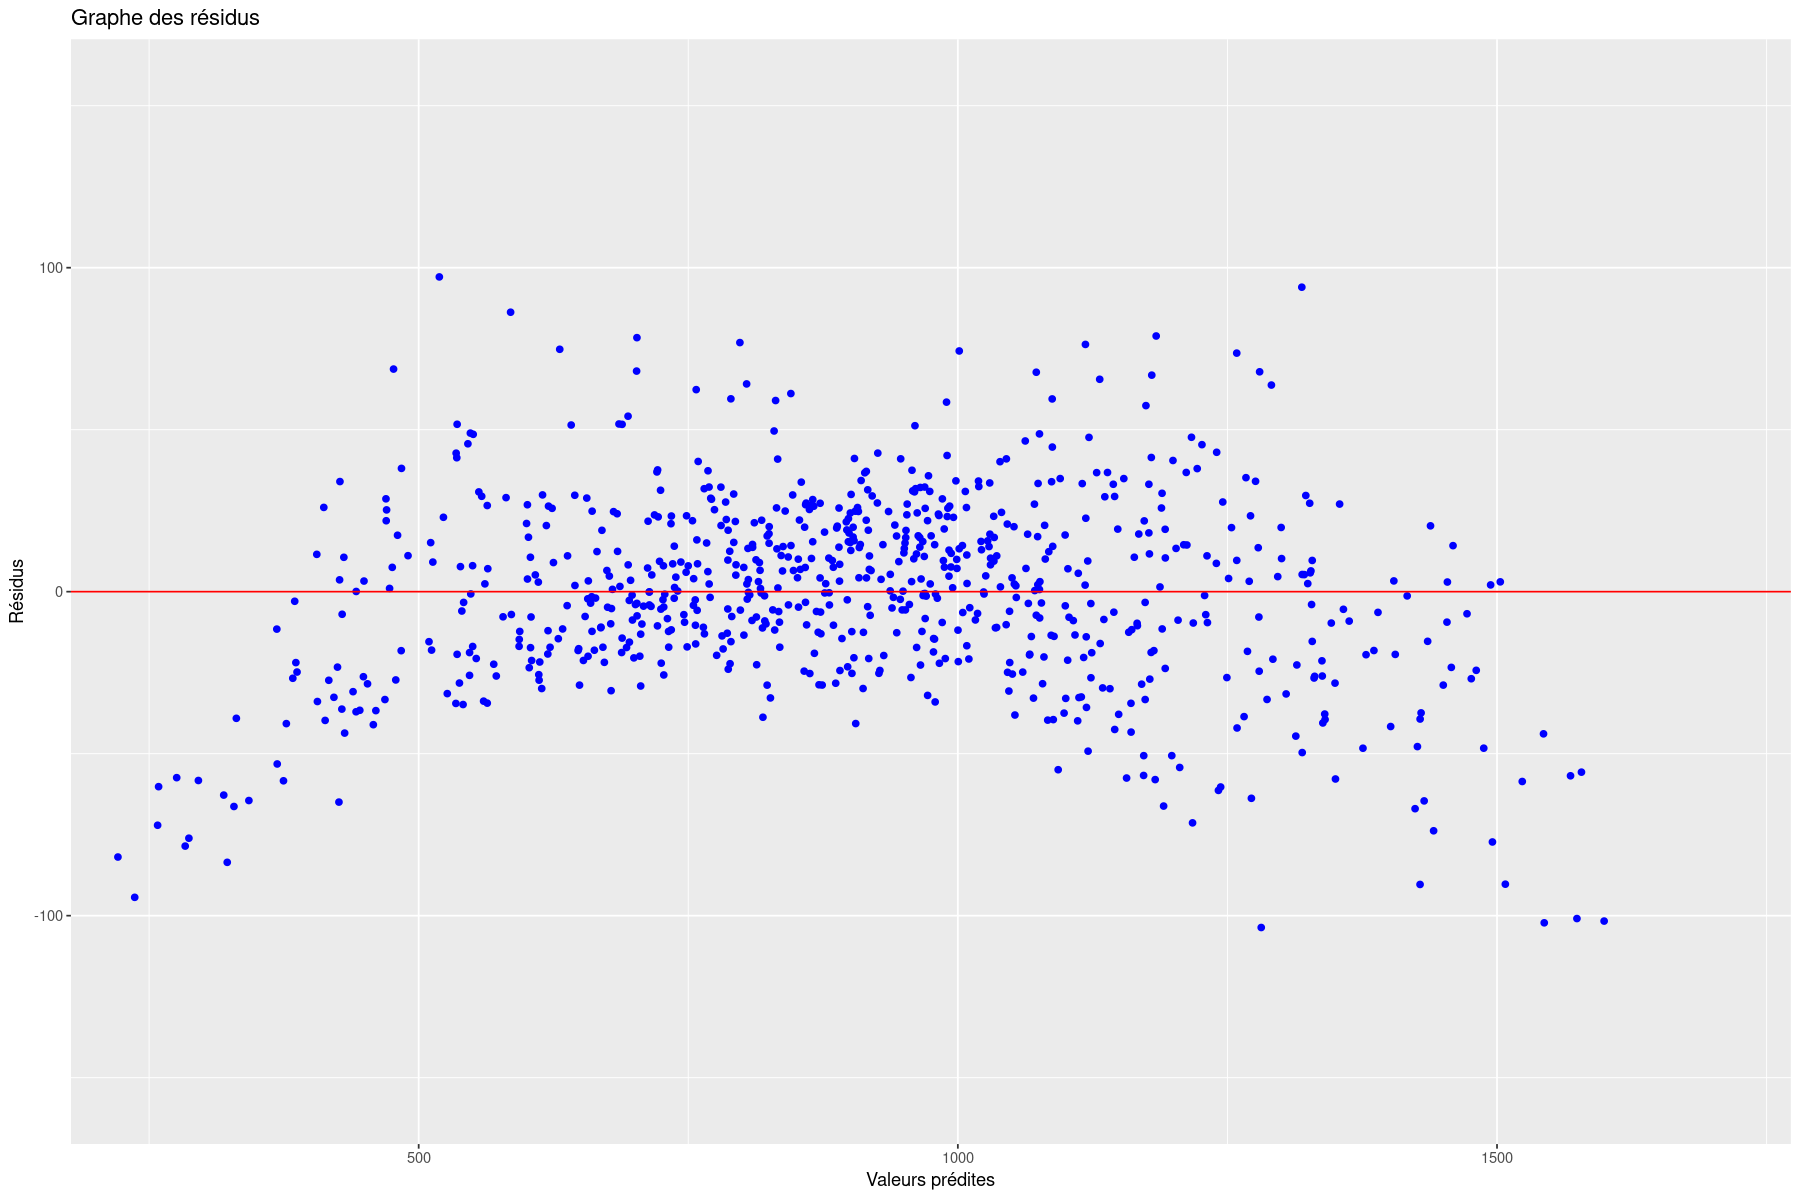

### 2.6.2 Prévision de l'échantillon test, erreur de régression

Erreur quadratique moyenne Boosting : 1522.04

Le boosting a de bonnes performances. L'erreur de prévision est similaire à celle des modèles linéaires. Toutefois, son temps de calcul est plus long et son interprétabilité plus faible.

## 2.7 Réseau de neurones

### 2.7.1 Régression

# weights:  106
initial  value 696614301.204971 
iter  10 value 11815488.806902
iter  20 value 9907992.935649
iter  30 value 9239569.297350
iter  40 value 8893252.526438
iter  50 value 8279860.444678
iter  60 value 7823505.581417
iter  70 value 7496233.585802
iter  80 value 7328098.849022
iter  90 value 7183612.038981
iter 100 value 7022005.021008
iter 110 value 6961450.763896
iter 120 value 6927927.812937
iter 130 value 6873960.469433
iter 140 value 6835394.118427
iter 150 value 6778453.455402
iter 160 value 6458490.285151
iter 170 value 5707309.142937
iter 180 value 5505328.310736
iter 190 value 5280869.550518
iter 200 value 5214856.226909
iter 210 value 4944067.162798
iter 220 value 4801973.635761
iter 230 value 4764360.572225
iter 240 value 4696028.822501
iter 250 value 4425686.362202
iter 260 value 3301076.383796
iter 270 value 2258556.561408
iter 280 value 1596727.804780
iter 290 value 1382527.671272
iter 300 value 1291937.213776
iter 310 value 1243275.592187
iter 320 value 11964

Size définit le nombre de neurones dans la couche cachée. Plus size est grand, plus le réseau a de capacité à apprendre des relations complexes (modèle plus puissant). Decay est le coefficient de régularisation L2 (penalisation des poids). Nous cherchons les paramètres optimaux grâce à la fonction Tune.nnet.

D'après les graphiques, des paramètres optimaux pour size et decay sont respectivement 7 et 2.

# weights:  148
initial  value 696883965.501210 
iter  10 value 118644678.015947
iter  20 value 88627878.121117
iter  30 value 63450019.639653
iter  40 value 49996167.600951
iter  50 value 40430990.689757
iter  60 value 33401046.240214
iter  70 value 29117948.822376
iter  80 value 26207782.896068
iter  90 value 25131846.335971
iter 100 value 20890792.604868
iter 110 value 18775217.199023
iter 120 value 18289999.638604
iter 130 value 17931531.299032
iter 140 value 17460047.281534
iter 150 value 15544863.380140
iter 160 value 14053586.745768
iter 170 value 13138573.305211
iter 180 value 12549672.255530
iter 190 value 12059872.525297
iter 200 value 11748181.514475
iter 210 value 11640530.628969
iter 220 value 11404660.874059
iter 230 value 11189278.691362
iter 240 value 10952944.453460
iter 250 value 10386457.015276
iter 260 value 10065578.052358
iter 270 value 9483727.188147
iter 280 value 8898104.394158
iter 290 value 8068707.450036
iter 300 value 6847462.063547
iter 310 value 5506568.8

a 19-7-1 network with 148 weights
options were - linear output units  decay=2
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   2.70    0.18   -0.42    3.83    0.02   -0.44    0.01    1.42    0.02   -0.40 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
   0.06    0.18    0.11   -0.52   -2.16    3.43    2.87    2.04    6.78   -7.17 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  -0.02   -2.59  -12.05   -2.06    0.93   -7.56    8.32  -11.92    7.33    2.96 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
   0.63   -7.43    6.61   -1.69  -11.24   -8.75   12.21  -12.08   -5.75   -8.89 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
  -2.05   -0.07    0.43   -0.71   -0.11    0.12    0.13    2.00   -0.17   -0.56 
i10->h3 i11->h3 i12->h3 i13->h3 i14->h3 i15->h3 i16->h3 i17->h3 i18->h3 i19->h3 
   0.11    0.22    0.05   -1.62

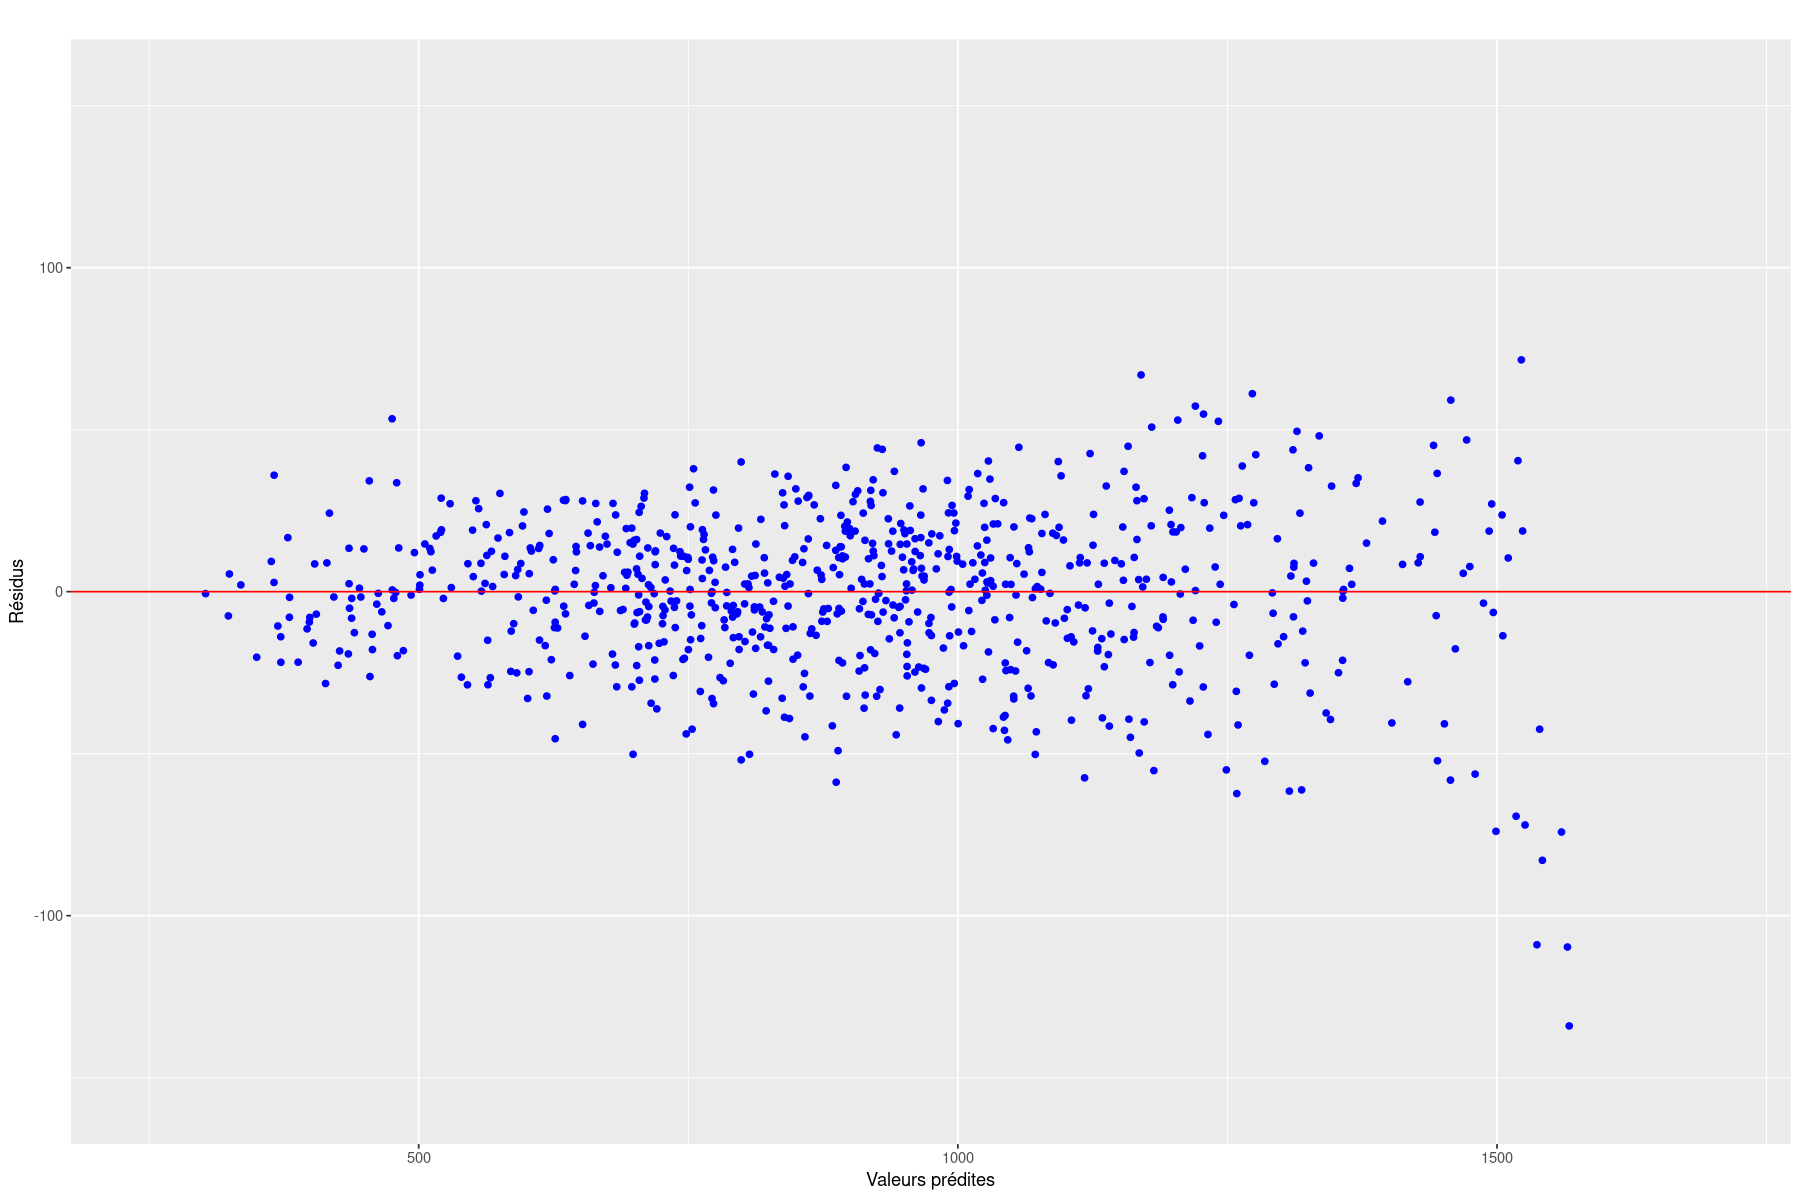

Les résidus sont bien aléatoires et independants.

### 2.7.2 Prévision de l'échantillon test, erreur de régression

Erreur quadratique moyenne RdN : 1629.631

La MSE du réseaux de neurones est similaire à celle des modèles linéaires (environ 1500). Il est important de noter que le tuning des paramètres pour le réseau de neurones est assez long et très couteux. De plus, nous observons une certaine variabilité des résultats due à l'initialisation àléatoire. Ici d'autres paramètres sont peut-être plus optimaux mais le coût de calcul pour leur recherche est conséquent et les résultats sont variables. 

## 2.8 Comparaison finale des différents modèles

Finalement, voici les résultats des différents modèles sur l'échantillon test. Pour des raisons d'explicabilité et d'interprétation des résultats nous affichons la RMSE et non la MSE car la RMSE est dans la même unité que "Calories_Burned", soit en calories.

In [77]:
cat("RMSE RdN :",sqrt(erreur_RDN),"\n")
cat("RMSE Boosting :",sqrt(erreur_boosting),"\n")
cat("RMSE Foret aléatoire :" ,sqrt(erreur_randomforest),"\n")
cat("RMSE Arbre optimal :",sqrt(erreur_arbreoptimal) ,"\n")
cat("RMSE pour un SVR avec noyau radial :",sqrt(erreur_SVR) , "\n")
cat("RMSE Modèle linéaire Lasso avec lambda.min :", sqrt(mse.lasso.min), "\n")
cat("RMSE Modèle linéaire  Lasso avec lambda.1se :", sqrt(mse.lasso.1se), "\n")
cat("RMSE modèle linéaire sans sélection de variable :", sqrt(mse.lm), "\n")


RMSE RdN : 40.36869 
RMSE Boosting : 39.01333 
RMSE Foret aléatoire : 49.71818 
RMSE Arbre optimal : 81.24615 
RMSE pour un SVR avec noyau radial : 30.10558 
RMSE Modèle linéaire Lasso avec lambda.min : 44.80127 
RMSE Modèle linéaire  Lasso avec lambda.1se : 46.82352 
RMSE modèle linéaire sans sélection de variable : 44.65199 


##### Quels sont les modèles les plus performants ? Quel est le niveau de précision obtenu ? Quels modèles retenir si l’on ajoute une contrainte d’interprétabilité ?

SVR avec un noyau radial est le modèle le plus performant avec une RMSE égale à 30. Ainsi, lors de la prédiction du nombre Il est suivi par le modèle par boosting avec une RMSE égale à 39.

Or, SVR, Boosting, Réseaux de neurones ont un niveau d'interprétabilité très faible.

Donc si on rajoute une contrainte d'interprétabilité, les modèles linéaires sont les plus pertinents. Le modèle avec sélection de variables LASSO avec lambda.min semble être le meilleur compromis avec une MSE égale à 2007.

##### Retour sur l'analyse de données

vos résultats sont-ils cohérents avec l’analyse exploratoire des données, par exemple en ce qui concerne l’importance des variables ?

Les résultats obtenus sont cohérents avec l'analyse exploratoire des données. En effet, les modèles linéaires avec sélection de variable et l'arbre optimal ont confirmé nos analyses sur la grande importance de la variable "Durée de la session". Nous avons également retrouvé l'importance du genre dans la sélection des variables des modèles linéaires. Toutefois, nous n'avions pas trouvé grande importance à la variable "Avg_BPM" dans notre analyse exploratoire alors que les modèles de prédiction ont mis en avant cette variable.